# Implementing logistic regression from scratch

Reference:<br>
https://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/


# Equation


yhat_prob = 1.0 / (1.0 + e^(-(b0 + b1 * x1)))

Below code implements the above formula to get predictions probabilities <br>
We are hard coding values of b0 and b1 for now, we will later calculate using SGD

In [24]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
dataset = [[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]]

In [5]:
df = pd.DataFrame(dataset, columns = ['var1', 'var2', 'y'])
df.head()

,var1,var2,y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0


In [8]:
coef = [-0.406605464, 0.852573316, -1.104746259]
b0 = coef[0]
b1 = coef[1]
b2 = coef[2]

probs = []
for row in dataset:
    yhat = b0 + (b1*row[0]) + (b2*row[1])
    prob = 1/(1 + math.exp(-yhat))
    probs.append(prob)

df_result = df.copy()
df_result['pred_prob'] = probs    
df_result['yhat'] = np.where(df_result.pred_prob >= 0.5, 1, 0)
df_result

,var1,var2,y,pred_prob,yhat
0,2.781084,2.550537,0,0.298757,0
1,1.465489,2.362125,0,0.145951,0
2,3.396562,4.400294,0,0.085333,0
3,1.388070,1.850220,0,0.219737,0
4,3.064072,3.005306,0,0.247059,0
5,7.627531,2.759262,1,0.954702,1
6,5.332441,2.088627,1,0.862034,1
7,6.922597,1.771064,1,0.971773,1
8,8.675419,-0.242069,1,0.999295,1
9,7.673756,3.508563,1,0.905489,1


Formula works with our test data and b0 and b1

# Estimating coefficients using SGD
b1(t+1) = b1(t) + learning_rate * (y(t) - yhat(t)) * yhat(t) * (1 - yhat(t)) * x1(t) <br>
b0(t+1) = b0(t) + learning_rate * (y(t) - yhat(t)) * yhat(t) * (1 - yhat(t))`

In [9]:
def sgd(rows, y, epochs = 100, lr = 0.1):
    b = [0.0]* (len(rows[0])+1)
    for epoch in range(epochs):
        sum_error = 0
        for i, row in enumerate(rows):
            yhat = predict(row, b)
            error = y[i] - yhat
            sum_error += error ** 2
            b[0] = b[0] + (lr * error * yhat * (1.0 - yhat))
            
            for i in range(1, len(b)):
                b[i] = b[i] + (lr * error * yhat * (1.0 - yhat) * row[i-1])
        if epoch%10 == 0:        
            #print(f'{epoch} {sum_error:.4f}, {np.array(b)}')
            print(f'{epoch} {sum_error:.4f}')
            
    print(np.array(b))                
    return b

In [13]:
def predict(row, coefs):
    #print(coefs)
    #yhat = [row[i] * coefs[i+1] for i in range(len(row))][0]
    yhat = coefs[0]
    for i in range(len(row)):
        #print(row[i])
        #print(coefs[i+1])
        yhat+=row[i]*coefs[i+1]
        
    prob = 1/(1+math.exp(-yhat))
    return prob

In [14]:
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return dataset

In [18]:
x_train = df.values[:,:2]
y_train = df.values[:,2]
coefs = sgd(x_train.tolist(), y_train.tolist(), lr = 0.3)

prob = []
for row in x_train:
    prob.append(predict(row, coefs))
y_test = np.around(prob)
y_test

0 2.2168
10 0.2475
20 0.1194
30 0.0776
40 0.0573
50 0.0454
60 0.0375
70 0.0320
80 0.0278
90 0.0247
[-0.85964435  1.52238251 -2.21870021]


array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [19]:
p = np.array(prob)
log_odds = np.log(np.divide(p, 1-p))
log_odds

array([-2.28464831, -3.86945637, -5.45171042, -2.85155478, -2.86282724,
        4.63040007,  2.62433428,  5.74973648, 12.88473905,  3.03829879])

Text(0.5, 1.0, 'var1 vs log_odds')

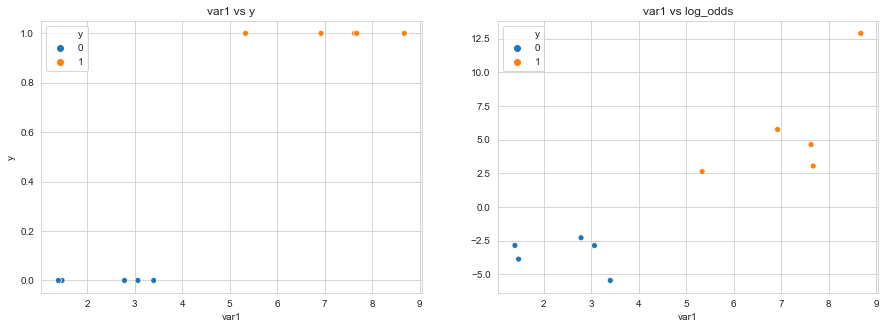

In [31]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.scatterplot(ax=axes[0], x="var1", y="y", data=df, hue="y")
axes[0].set_title('var1 vs y')

sns.scatterplot(ax=axes[1], x="var1", y=log_odds, data=df, hue="y")
axes[1].set_title('var1 vs log_odds')

Text(0.5, 1.0, 'var2 vs log_odds')

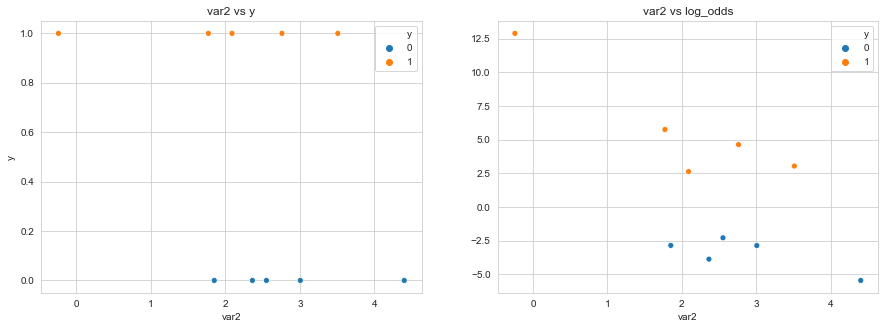

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.scatterplot(ax=axes[0], x="var2", y="y", data=df, hue="y")
axes[0].set_title('var2 vs y')

sns.scatterplot(ax=axes[1], x="var2", y=log_odds, data=df, hue="y")
axes[1].set_title('var2 vs log_odds')

From above plot we validate the linear assumption of variables with log-odds 

In [33]:
df = pd.read_csv('/Users/chiragpipalia/machinelearning_projects/ml_from_scratch/pima-indians-diabetes.csv')
df.head()

,times_pregnant,plasma_glucose_con,bp,triceps_skin_fold,insulin,bmi,diabetes,age,y
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
dataset1 = df.values
x_train = dataset1[:,:8]
y_train = dataset1[:,8]

min_max = dataset_minmax(x_train)
x_train = normalize_dataset(x_train, min_max)

coefs = sgd(x_train.tolist(), y_train.tolist(), epochs=100, lr = 0.3)

0 167.6443
10 124.5271
20 120.9774
30 119.9273
40 119.5119
50 119.3215
60 119.2264
70 119.1762
80 119.1488
90 119.1335
[-8.13266758  2.21500417  7.51340058 -1.46321477 -0.41037631 -0.80747435
  5.97241787  2.94293441  0.51884573]


In [39]:
prob = []
for row in x_train:
    prob.append(predict(row, coefs))
y_test = np.around(prob)

In [40]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
accuracy_metric(y_train, y_test)

77.21354166666666

In [41]:
p = np.array(prob)
log_odds = np.log(np.divide(p, 1-p))

In [42]:
dict(zip(df.columns[:-1], coefs[1:]))

{'times_pregnant': 2.215004167076813,
 'plasma_glucose_con': 7.513400583719227,
 'bp': -1.4632147734067042,
 'triceps_skin_fold': -0.41037631194412655,
 'insulin': -0.8074743463700056,
 'bmi': 5.972417874840843,
 'diabetes': 2.9429344061538676,
 'age': 0.5188457320865544}

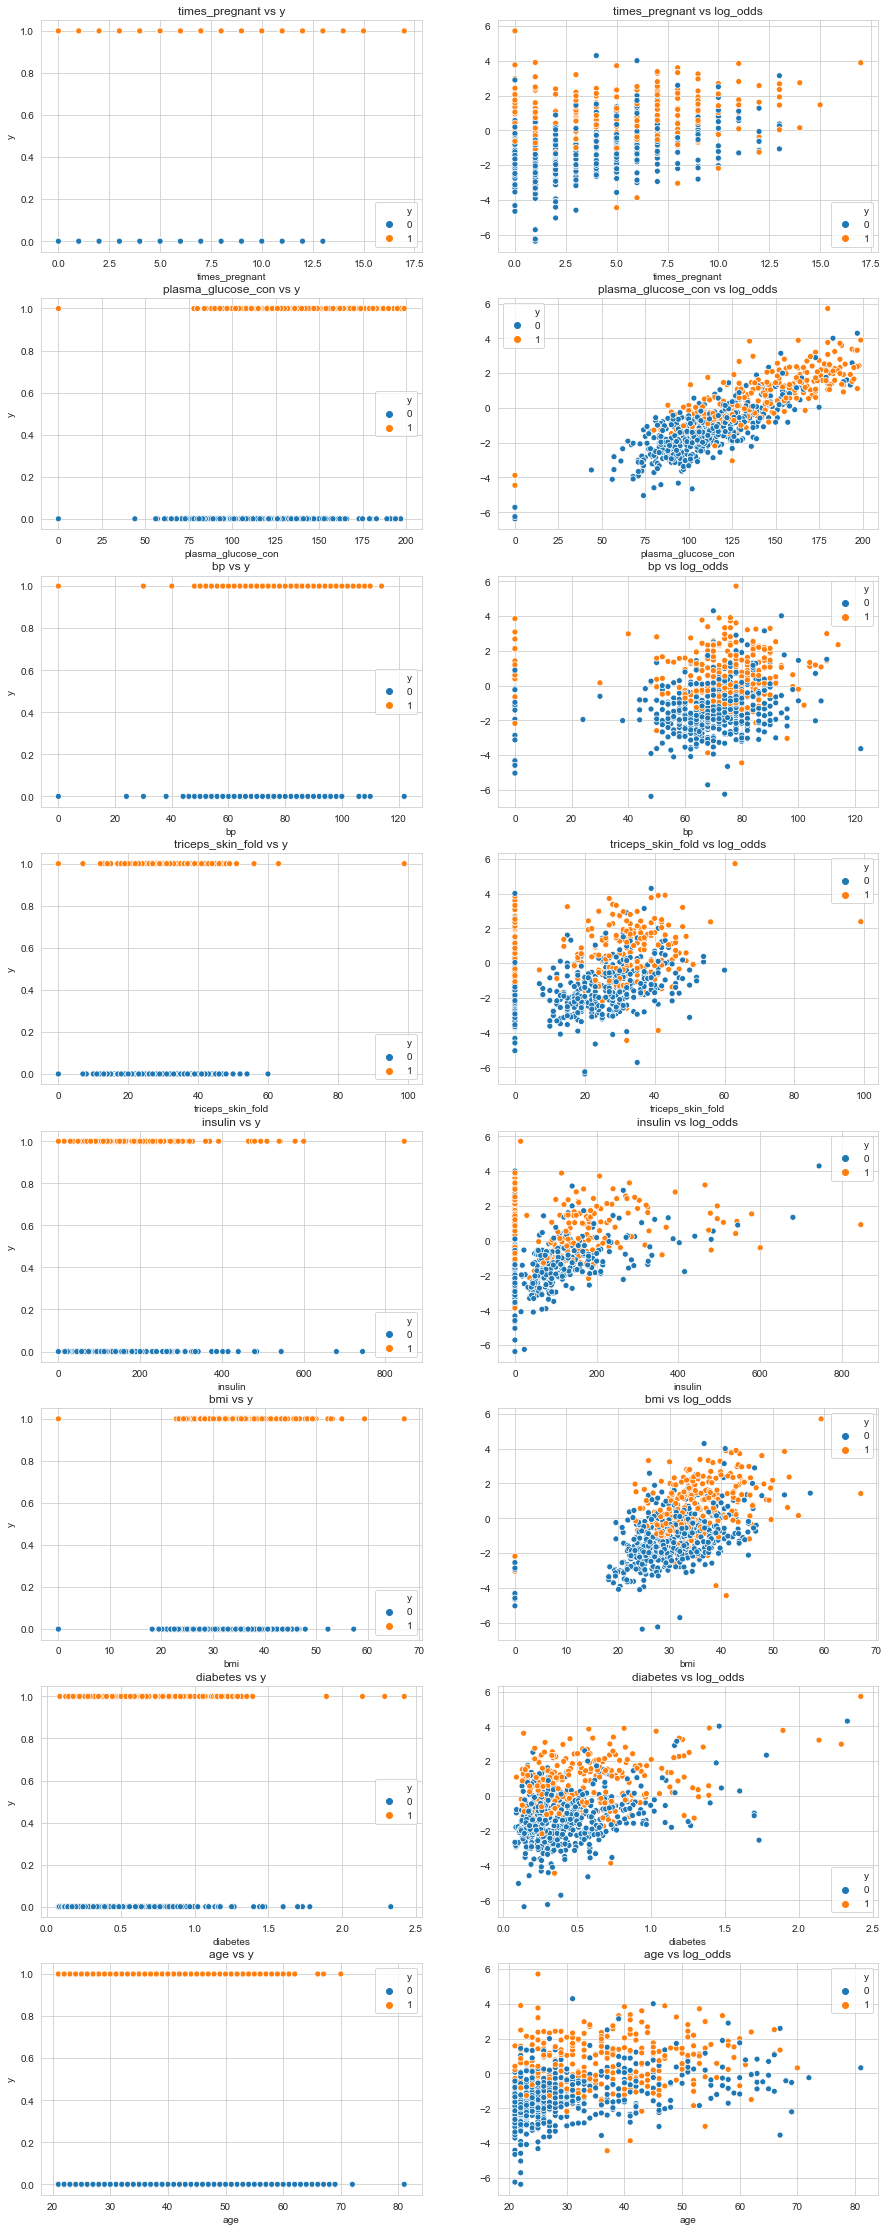

In [55]:
fig, axes = plt.subplots(ncols=2, nrows=8, figsize = (15, 40))
axes = axes.flat
count = 0
for i, col in enumerate(df.columns[:-1]):
    sns.scatterplot(ax=axes[i+count], x=df[col], y="y", data=df, hue="y")
    axes[i+count].set_title(f'{col} vs y')

    sns.scatterplot(ax=axes[i+count+1], x=df[col], y=log_odds, data=df, hue="y")
    axes[i+count+1].set_title(f'{col} vs log_odds')

    count+=1
